In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from datetime import datetime
import os

In [2]:
base_dir = '..'
data_dir = os.path.join(base_dir,'data','raw','daily_pm')

In [12]:
data = pd.read_csv(os.path.join(data_dir,'pm_2002.csv'))
time_map = lambda date: datetime.strptime(date,'%Y-%m-%d').toordinal()
site_a = data[data['Site']==10030010]
site_a['Time'] = site_a['Date'].apply(time_map)
site_a

/var/folders/tm/mw0_yxrx1419zt6ys2b7vd6x_klh1b/T/ipykernel_5219/468540328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_a['Time'] = site_a['Date'].apply(time_map)


,Site,POC,Date,Lat,Lon,Conc,Time
0,10030010,1,2002-01-02,30.497478,-87.880258,12.7,730852
1,10030010,1,2002-01-05,30.497478,-87.880258,12.5,730855
2,10030010,1,2002-01-08,30.497478,-87.880258,7.3,730858
3,10030010,1,2002-01-11,30.497478,-87.880258,6.7,730861
4,10030010,1,2002-01-14,30.497478,-87.880258,5.7,730864
...,...,...,...,...,...,...,...
108,10030010,1,2002-12-19,30.497478,-87.880258,6.8,731203
109,10030010,1,2002-12-22,30.497478,-87.880258,5.0,731206
110,10030010,1,2002-12-25,30.497478,-87.880258,3.4,731209
111,10030010,1,2002-12-28,30.497478,-87.880258,12.7,731212


<IPython.core.display.Javascript object>


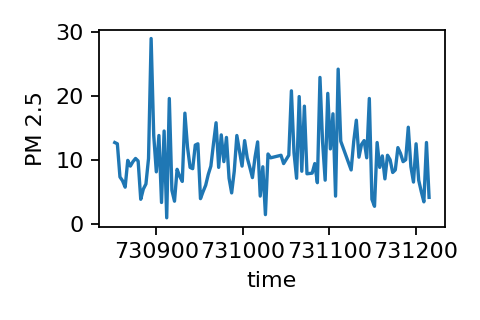

In [3]:
f,ax = plt.subplots(figsize=(3,2))
ax.plot(site_a['Time'],site_a['Conc'])
ax.set_xlabel('time')
ax.set_ylabel('PM 2.5')
f.tight_layout()

<IPython.core.display.Javascript object>


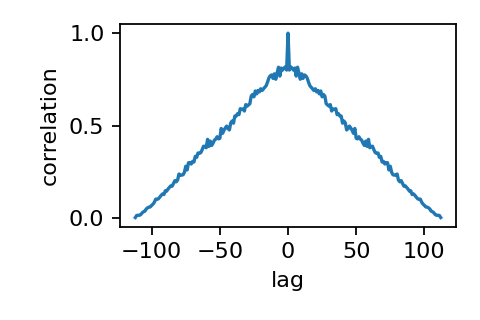

In [5]:
# autocorrelation
f,ax = plt.subplots(figsize=(3,2))
conc = site_a['Conc'].to_numpy()
autocorr = np.correlate(conc, conc, mode='full')
autocorr /= np.max(autocorr)
lags = np.arange(-len(conc) + 1, len(conc))

ax.plot(lags, autocorr)
ax.set_xlabel('lag')
ax.set_ylabel('correlation')
# ax.set_yscale('log')
f.tight_layout()

### Are nearby stations correlated? 

In [6]:
groups = data.groupby('Site')
site_lat = site_a.loc[0].Lat
site_lon = site_a.loc[0].Lon
distances = []; sites = []
for group in groups: 
    if group[0]!=10030010:
        sites.append(group[0])
        distances.append(np.sqrt((site_lat-group[1].iloc[0].Lat)**2+(site_lon-group[1].iloc[0].Lon)**2))

In [7]:
nearest_inds = np.argsort(distances)
nearest_sites = np.array(sites)[nearest_inds]
site_b = data[data['Site']==nearest_sites[0]]
site_b['Time'] = site_b['Date'].apply(time_map)
site_c = data[data['Site']==nearest_sites[-10]]
site_c['Time'] = site_c['Date'].apply(time_map)

/var/folders/tm/mw0_yxrx1419zt6ys2b7vd6x_klh1b/T/ipykernel_44736/2968356459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_b['Time'] = site_b['Date'].apply(time_map)
/var/folders/tm/mw0_yxrx1419zt6ys2b7vd6x_klh1b/T/ipykernel_44736/2968356459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_c['Time'] = site_c['Date'].apply(time_map)


In [ ]:
# sav

<IPython.core.display.Javascript object>


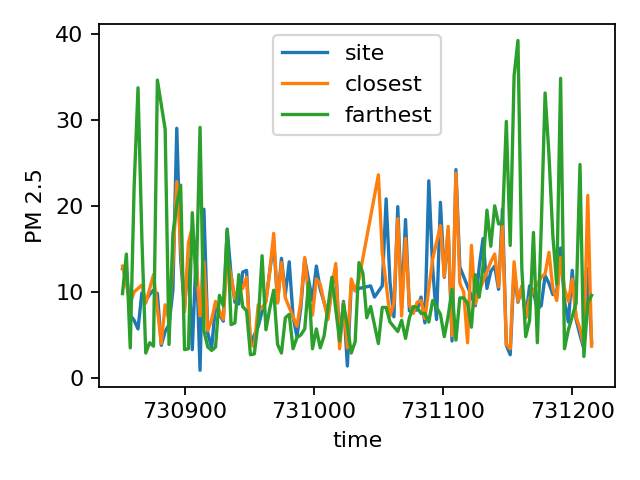

In [8]:
f,ax = plt.subplots(figsize=(4,3))
ax.plot(site_a['Time'],site_a['Conc'])
ax.plot(site_b['Time'],site_b['Conc'])
ax.plot(site_c['Time'],site_c['Conc'])

ax.set_xlabel('time')
ax.set_ylabel('PM 2.5')
ax.legend(['site','closest','farthest'])
f.tight_layout()

<IPython.core.display.Javascript object>


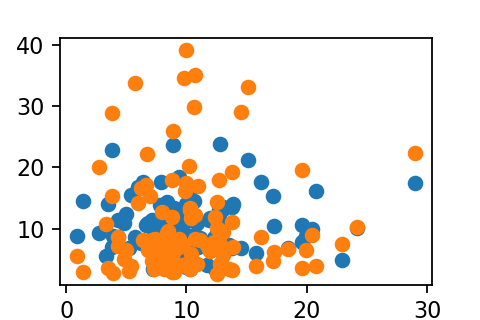

In [73]:
f,ax = plt.subplots(figsize=(3,2))
ax.scatter(site_a['Conc'].to_numpy()[:len(site_b)],site_b['Conc'].to_numpy())
ax.scatter(site_a['Conc'].to_numpy()[:len(site_b)],site_c['Conc'].to_numpy()[:len(site_b)])

## Let's look at the station locations


In [18]:
data = pd.read_csv(os.path.join(data_dir,'pm_2002.csv'))
data = data[data['Date']=='2002-09-05']

<IPython.core.display.Javascript object>


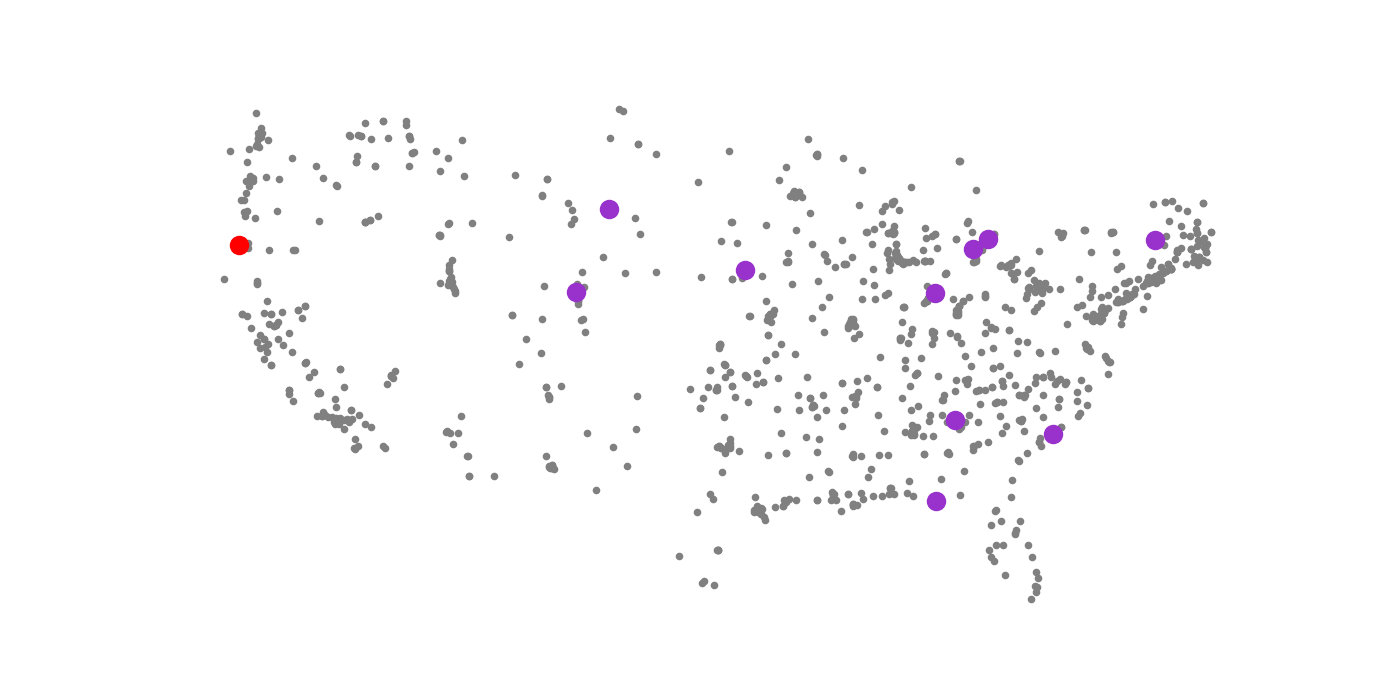

<IPython.core.display.Javascript object>


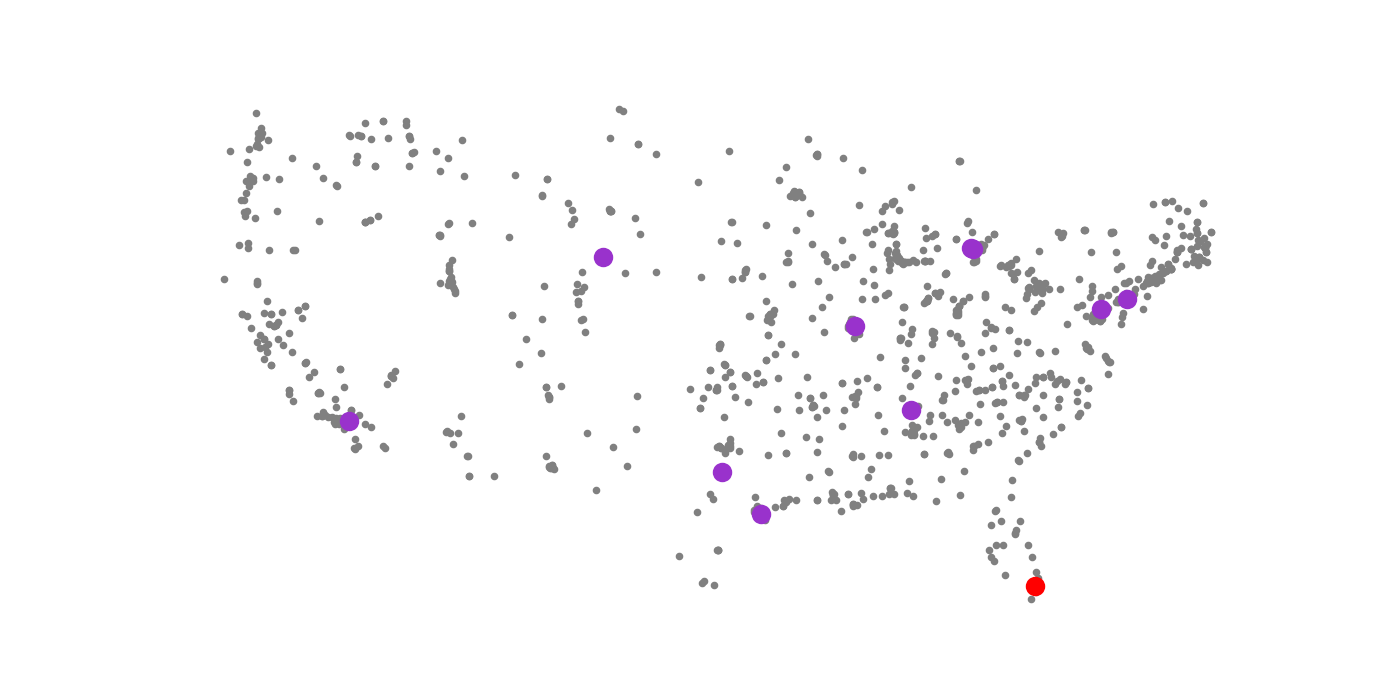

<IPython.core.display.Javascript object>


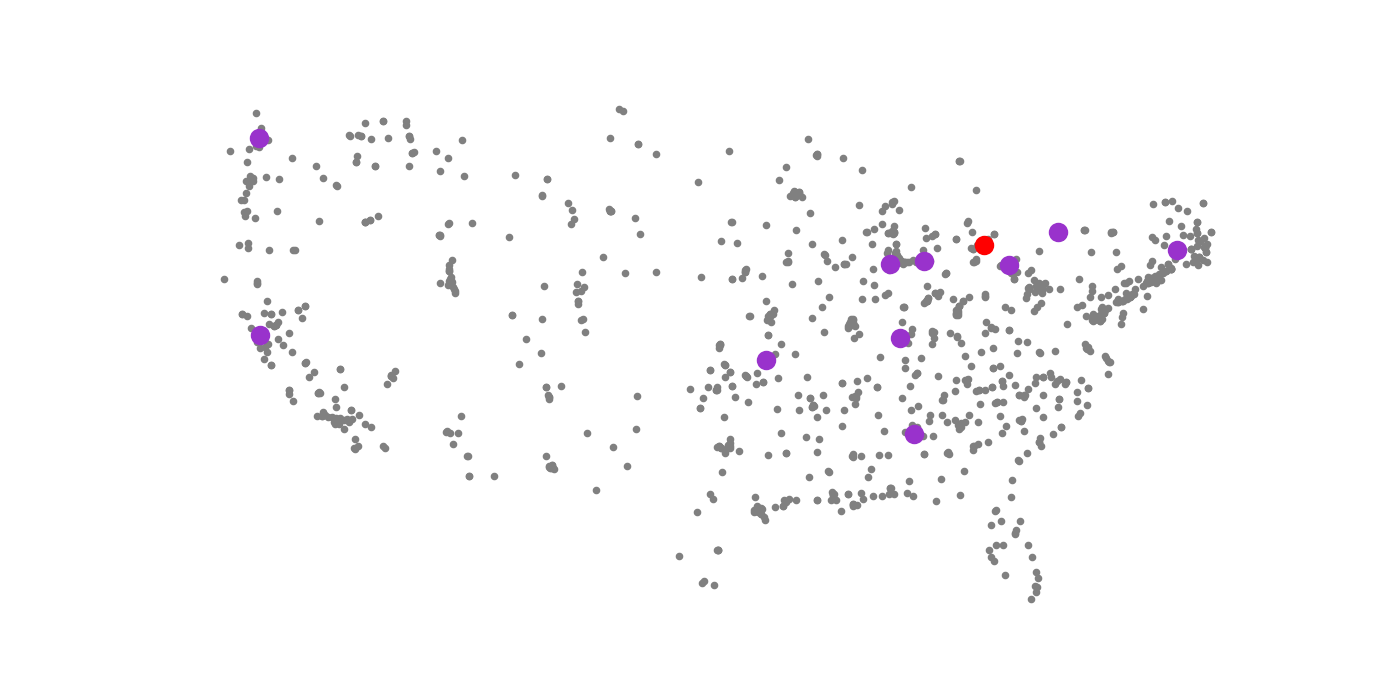

In [20]:
inds = np.arange(len(data))
lats = data['Lat'].to_numpy()
lons = data['Lon'].to_numpy()

for i in range(3):
    np.random.shuffle(inds)
    train = inds[:10]
    query = inds[11]

    f,ax = plt.subplots(figsize=(7,3.5))
    ax.scatter(data['Lon'].to_numpy(), data['Lat'].to_numpy(),s=3, c='gray') 
    ax.scatter(lons[train], lats[train], c='darkorchid')
    ax.scatter(lons[query], lats[query], c='red')
    ax.axis('off')


[467 468 469 470 471 472 473 474 475 476]


<IPython.core.display.Javascript object>


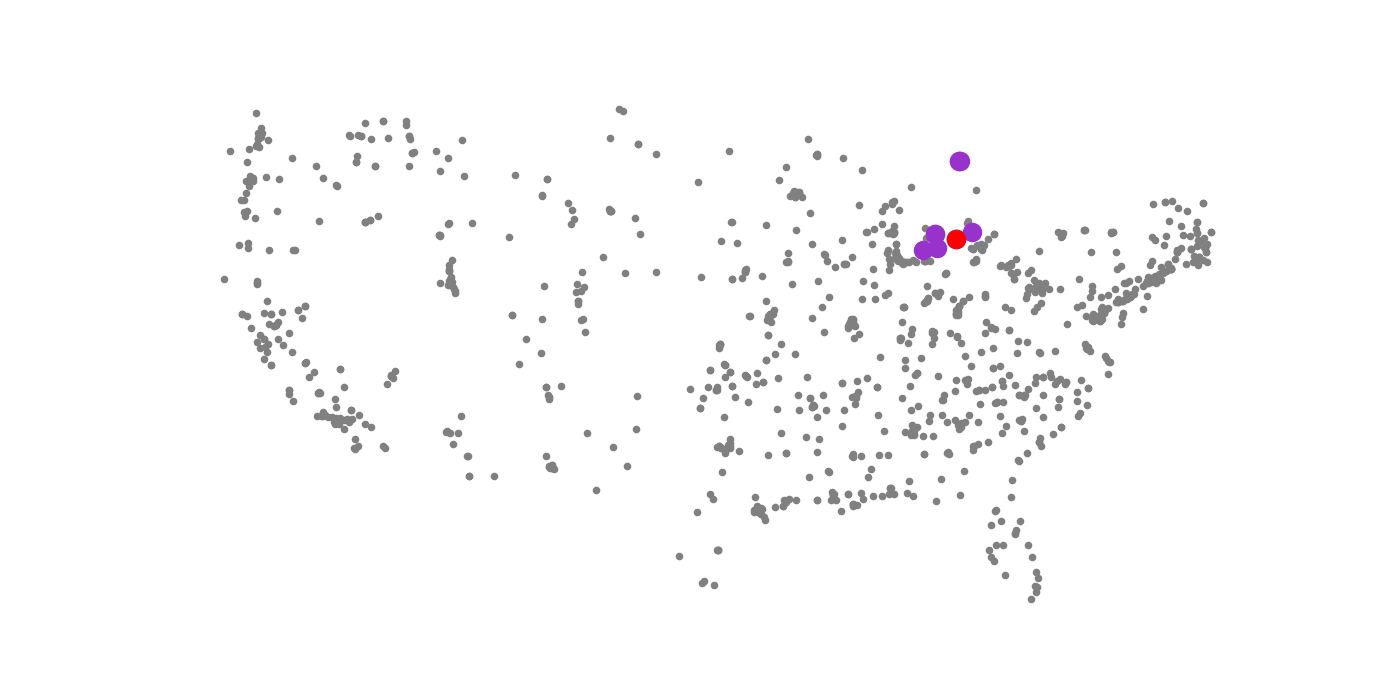

[893 894 895 896 897 898 899 900 901 902]


<IPython.core.display.Javascript object>


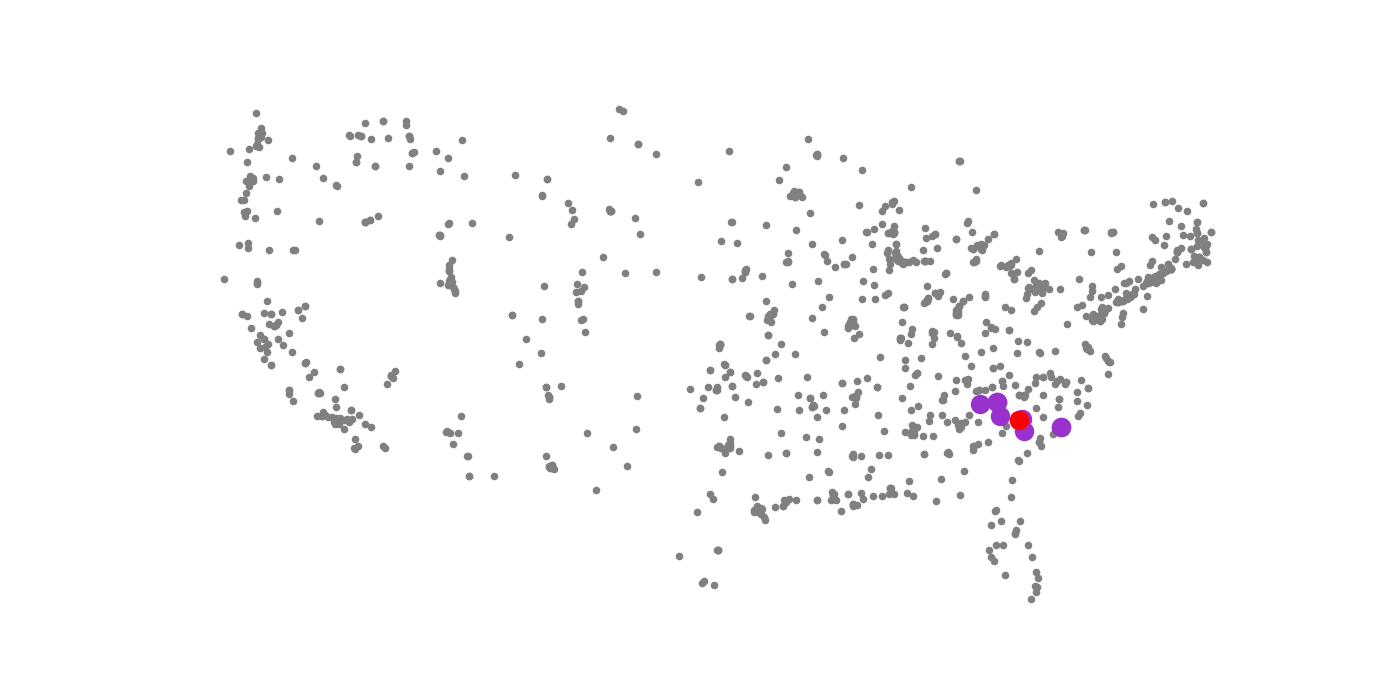

[645 646 647 648 649 650 651 652 653 654]


<IPython.core.display.Javascript object>


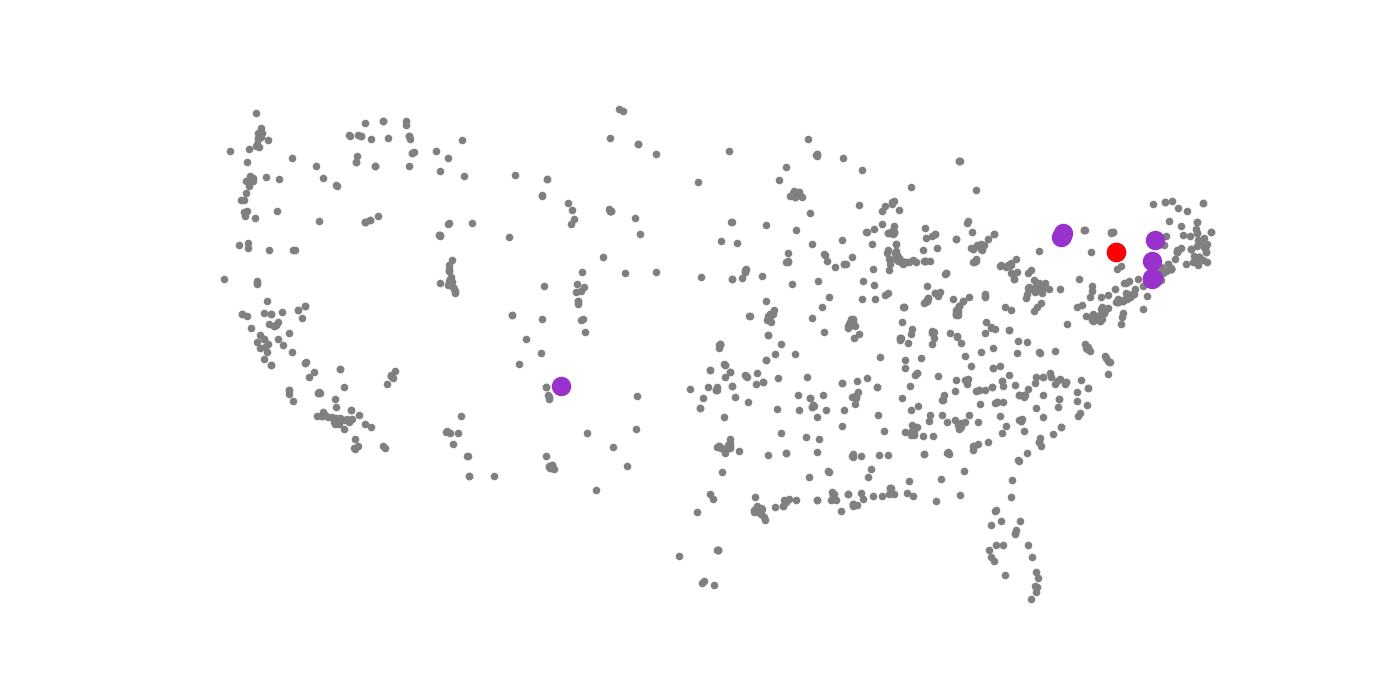

In [21]:
inds = np.arange(len(data))
lats = data['Lat'].to_numpy()
lons = data['Lon'].to_numpy()

for i in range(3):
    query = np.random.randint(0,len(data))
    train = inds[query-5:query+5]
    print(train)

    f,ax = plt.subplots(figsize=(7,3.5))
    ax.scatter(data['Lon'].to_numpy(), data['Lat'].to_numpy(),s=3, c='gray') 
    ax.scatter(lons[train], lats[train], c='darkorchid')
    ax.scatter(lons[query], lats[query], c='red')
    ax.axis('off')


In [19]:
data

,Site,POC,Date,Lat,Lon,Conc
76,10030010,1,2002-09-05,30.497478,-87.880258,20.4
193,10270001,1,2002-09-05,33.284928,-85.803608,29.1
402,10491003,1,2002-09-05,34.288567,-85.969858,30.3
515,10530002,1,2002-09-05,31.106567,-87.071081,18.0
619,10550010,1,2002-09-05,33.991494,-85.992647,32.0
...,...,...,...,...,...,...
164269,560131003,1,2002-09-05,42.842168,-108.736281,5.7
164381,560210001,1,2002-09-05,41.136846,-104.818239,9.0
164492,560330001,1,2002-09-05,44.797161,-106.949853,6.9
164610,560330002,1,2002-09-05,44.815142,-106.955933,7.8


In [2]:
joint_data = pd.read_csv('../data/processed/processed_pm25_gridmet.csv')
joint_data

,Split,Time,Lat,Lon,Elevation,Target,min_air_temperature_value,max_air_temperature_value,min_relative_humidity_value,max_relative_humidity_value,wind_speed_value,precipitation_amount_value
0,train,731752,0.527122,0.987017,0.368421,5.7,0.650470,0.677465,0.451382,0.958134,0.084270,0.000000
1,train,731755,0.724012,0.206202,0.231879,7.2,0.724138,0.701408,0.466735,0.758373,0.275281,0.026667
2,train,734500,0.542650,0.581214,0.405817,8.3,0.532915,0.453521,0.523030,0.876794,0.247191,0.000000
3,val,733294,0.137414,0.502005,0.247922,9.1,0.909091,0.805634,0.429887,0.864833,0.117978,0.005079
4,train,737197,0.329831,0.545668,0.379501,12.5,0.804075,0.791549,0.447288,1.000000,0.134831,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1014476,train,731632,0.200162,0.560894,0.274238,11.5,0.611285,0.559155,0.407369,0.839713,0.280899,0.001270
1014477,train,735814,0.449188,0.136956,0.358495,9.3,0.871473,0.822535,0.501535,1.000000,0.089888,0.019048
1014478,train,736754,0.219786,0.593096,0.291551,8.0,0.652038,0.659155,0.501535,1.000000,0.348315,0.019683
1014479,train,736283,0.224677,0.884865,0.253463,83.9,0.598746,0.618310,0.314227,0.898325,0.073034,0.000000


In [3]:
joint_data.columns

Index(['Split', 'Time', 'Lat', 'Lon', 'Elevation', 'Target',
       'min_air_temperature_value', 'max_air_temperature_value',
       'min_relative_humidity_value', 'max_relative_humidity_value',
       'wind_speed_value', 'precipitation_amount_value'],
      dtype='object')

<IPython.core.display.Javascript object>


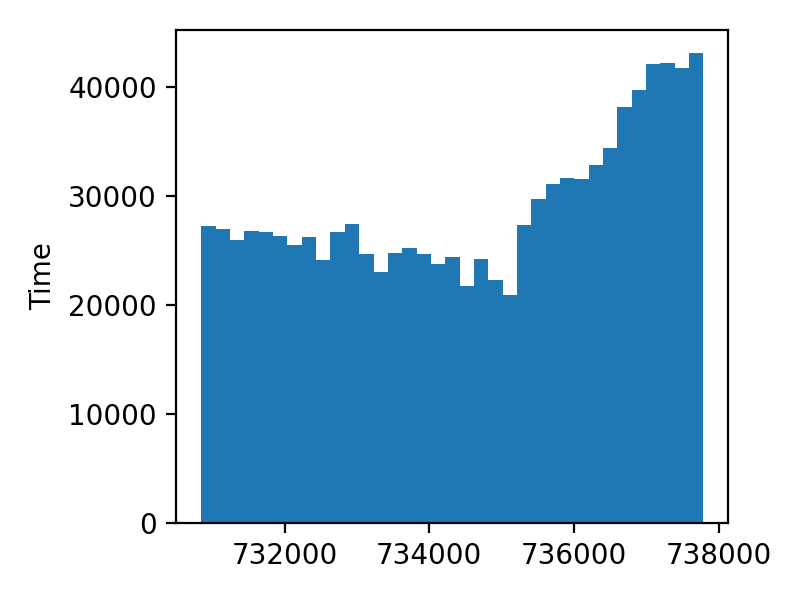

<IPython.core.display.Javascript object>


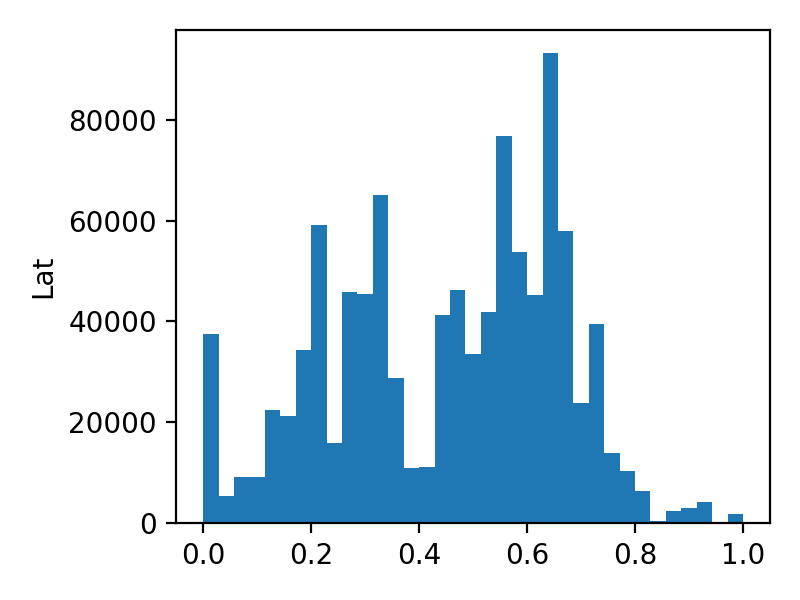

<IPython.core.display.Javascript object>


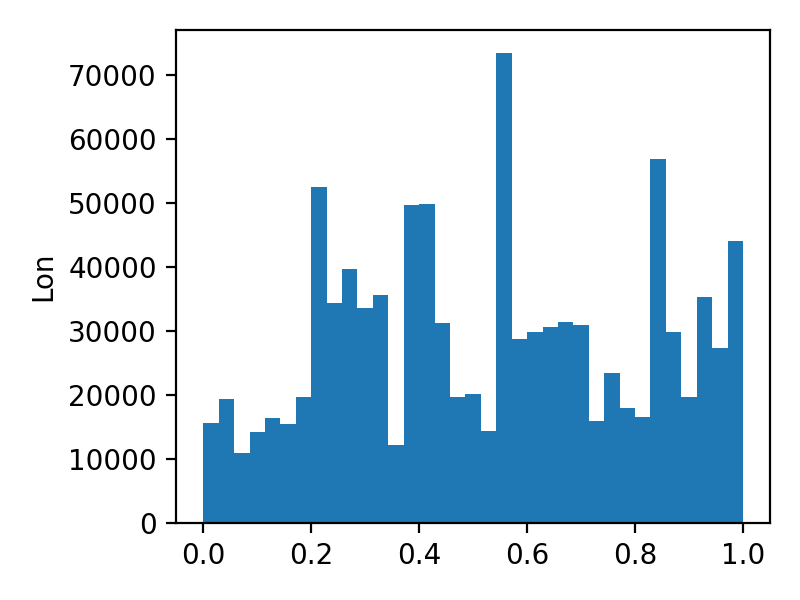

<IPython.core.display.Javascript object>


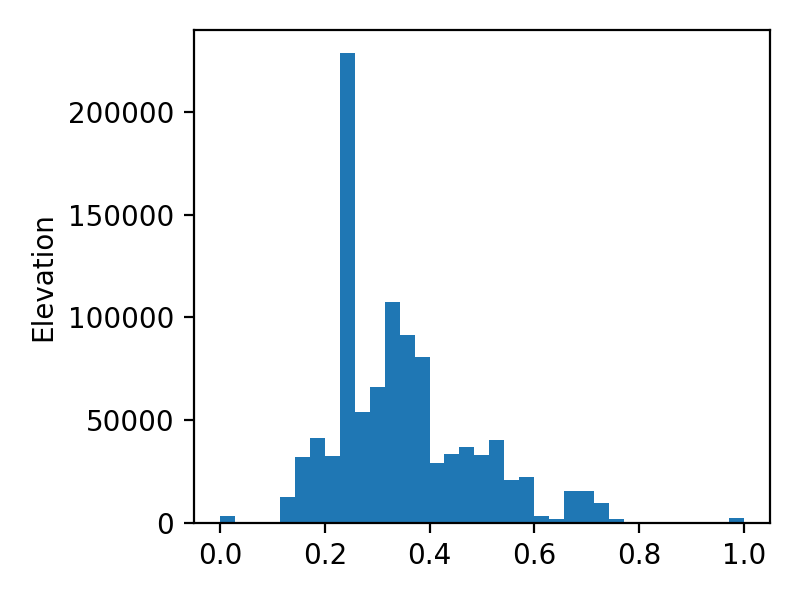

<IPython.core.display.Javascript object>


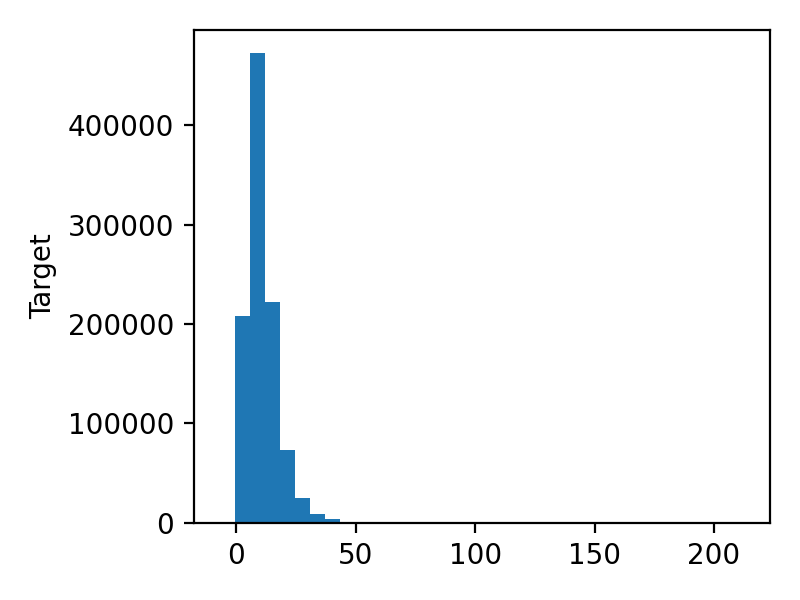

<IPython.core.display.Javascript object>


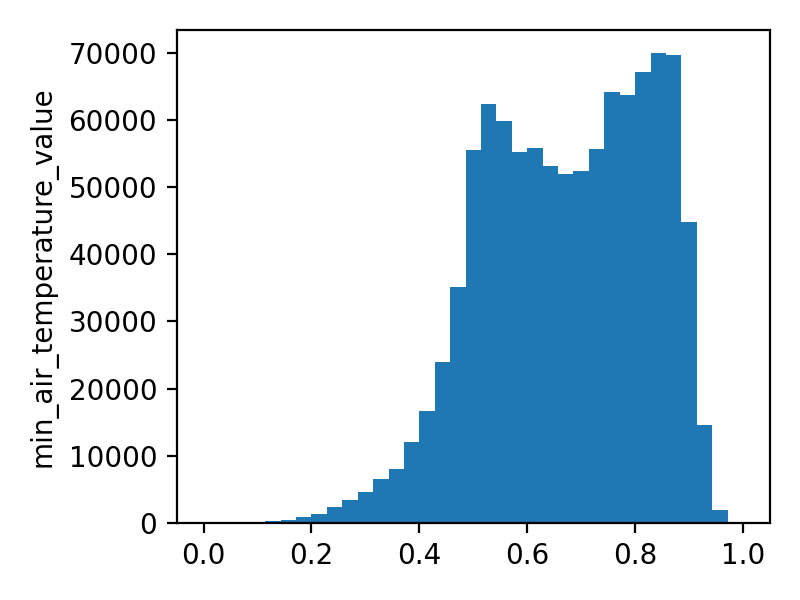

<IPython.core.display.Javascript object>


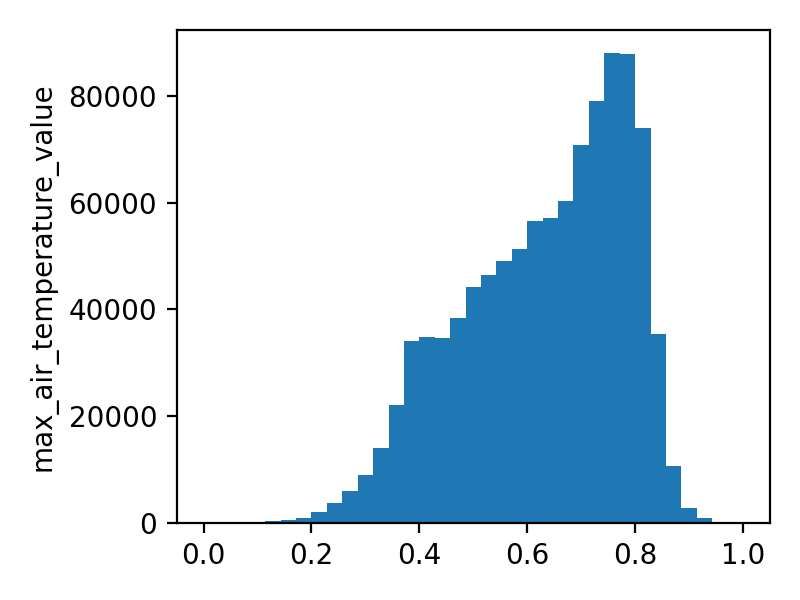

<IPython.core.display.Javascript object>


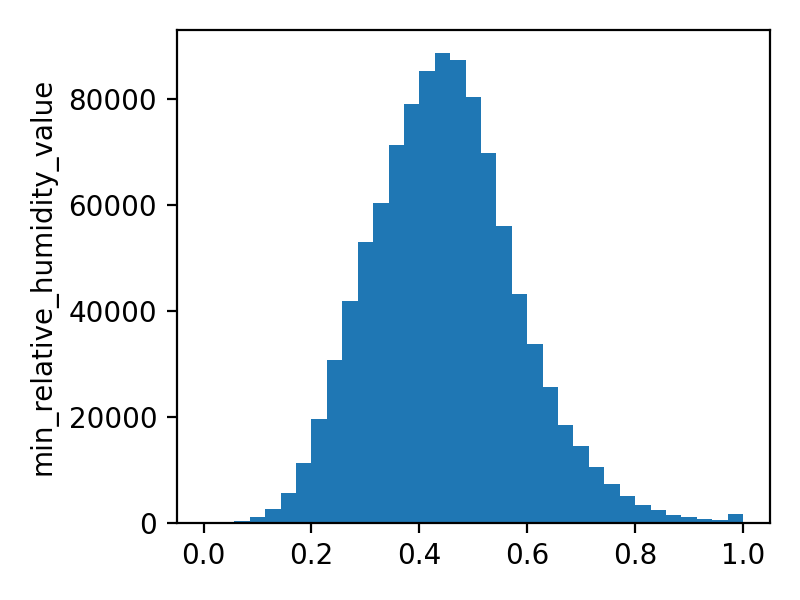

<IPython.core.display.Javascript object>


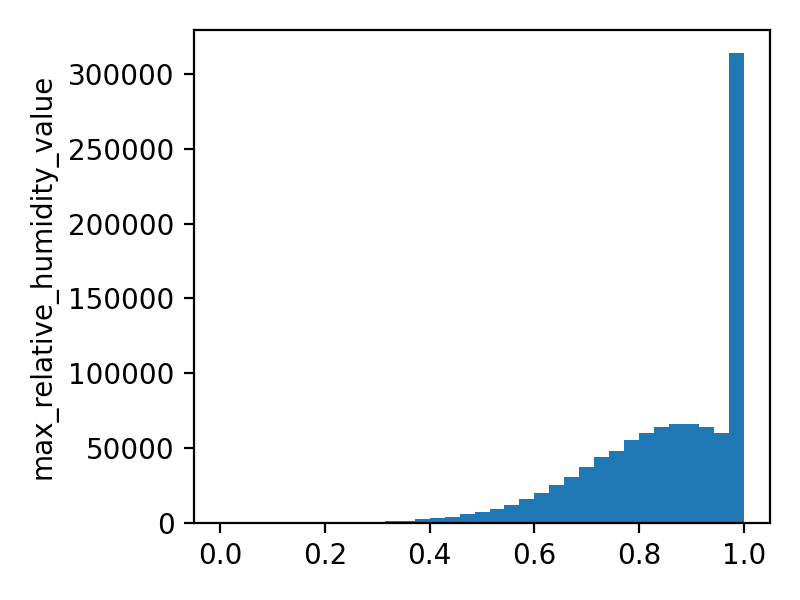

<IPython.core.display.Javascript object>


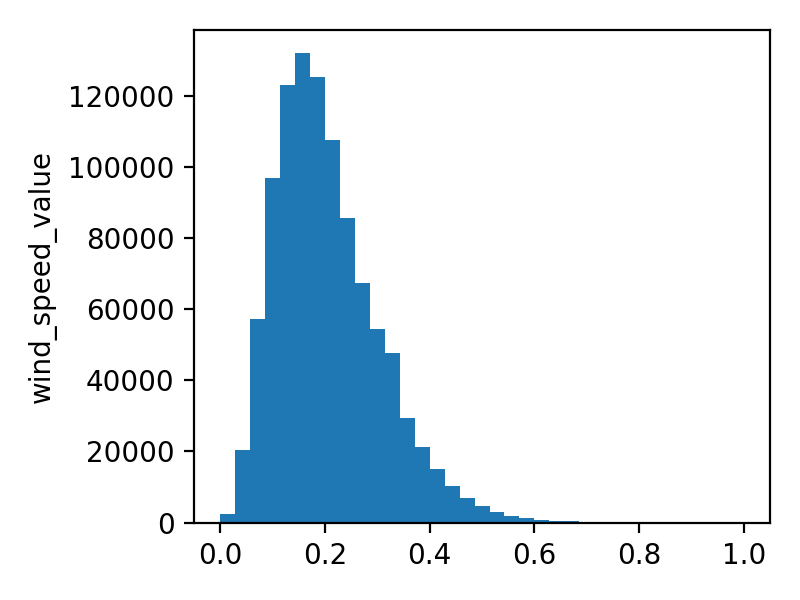

<IPython.core.display.Javascript object>


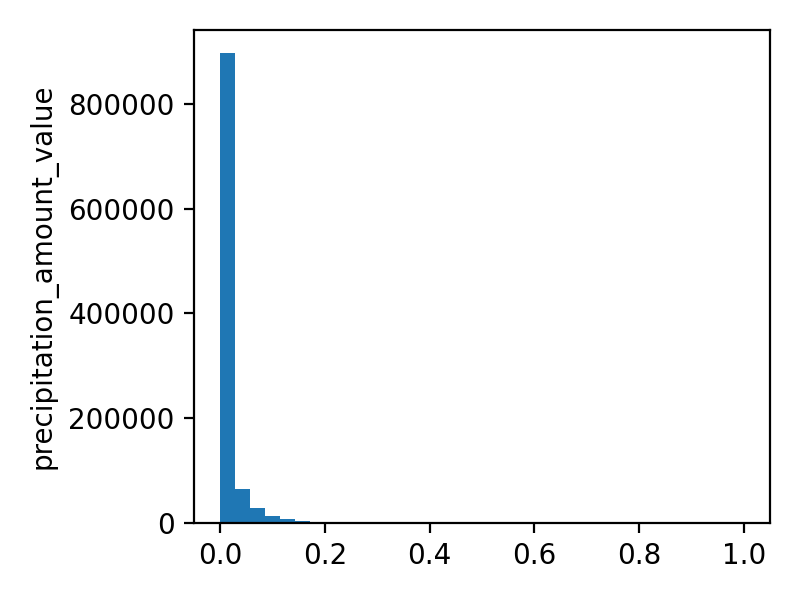

In [6]:
columns = list(joint_data.columns)[1:]
for column in columns:
    f,ax = plt.subplots(figsize=(4,3))
    ax.set_ylabel(column)
    ax.hist(joint_data[column].to_list(), bins=35)
    f.tight_layout()